In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [5]:
data=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
print(data.shape)

(299, 13)


In [6]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
threshold = 3
print(np.where(z > 3))
data = data[(z < 3).all(axis=1)]
data.shape

[[1.19294523e+00 8.71104775e-01 1.65728387e-04 ... 6.87681906e-01
  1.62950241e+00 1.45416070e+00]
 [4.91279276e-01 8.71104775e-01 7.51463953e+00 ... 6.87681906e-01
  1.60369074e+00 1.45416070e+00]
 [3.50832977e-01 8.71104775e-01 4.49938761e-01 ... 1.45416070e+00
  1.59078490e+00 1.45416070e+00]
 ...
 [1.33339153e+00 8.71104775e-01 1.52597865e+00 ... 6.87681906e-01
  1.90669738e+00 6.87681906e-01]
 [1.33339153e+00 8.71104775e-01 1.89039811e+00 ... 1.45416070e+00
  1.93250906e+00 6.87681906e-01]
 [9.12335403e-01 8.71104775e-01 3.98321274e-01 ... 1.45416070e+00
  1.99703825e+00 6.87681906e-01]]
(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296]), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6]))


(280, 13)

In [7]:
print(data.columns)
y=data['DEATH_EVENT']
x2=data.drop(['DEATH_EVENT'], axis = 1)


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler=MinMaxScaler()
scaler.fit(x2)
X=scaler.transform(x2)
X=pd.DataFrame(data=X,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
print(X.shape)
print(X.head())
print(X.columns)

#pca=PCA(n_components=3)
#pca.fit(scale_data)
#x_pca=pca.transform(scale_data)
#x_pca.shape


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.077359,-0.099273,-0.082555,0.106414,0.086032,-0.028379,0.231830,-0.033756,0.058342,-0.007560,-0.236505,0.259299
anaemia,0.077359,1.000000,-0.144906,-0.014291,0.037141,0.014892,-0.017951,-0.051654,0.090741,-0.086821,-0.098411,-0.136298,0.039480
creatinine_phosphokinase,-0.099273,-0.144906,1.000000,0.011658,-0.078583,-0.046820,-0.047819,-0.087296,0.063430,0.033589,-0.079764,0.151120,-0.029289
diabetes,-0.082555,-0.014291,0.011658,1.000000,-0.007449,-0.003070,0.067170,-0.053498,-0.063822,-0.159301,-0.136820,0.033602,0.001009
ejection_fraction,0.106414,0.037141,-0.078583,-0.007449,1.000000,0.038059,0.101141,-0.177942,0.182741,-0.115985,-0.040007,0.039776,-0.303506
high_blood_pressure,0.086032,0.014892,-0.046820,-0.003070,0.038059,1.000000,0.057272,-0.051845,0.005079,-0.109578,-0.059963,-0.217323,0.064143
platelets,-0.028379,-0.017951,-0.047819,0.067170,0.101141,0.057272,1.000000,-0.041153,0.021204,-0.140444,-0.023075,0.000260,-0.048259
serum_creatinine,0.231830,-0.051654,-0.087296,-0.053498,-0.177942,-0.051845,-0.041153,1.000000,-0.245860,0.091135,-0.008193,-0.157540,0.329460
serum_sodium,-0.033756,0.090741,0.063430,-0.063822,0.182741,0.005079,0.021204,-0.245860,1.000000,-0.053602,0.006677,0.074459,-0.203471
sex,0.058342,-0.086821,0.033589,-0.159301,-0.115985,-0.109578,-0.140444,0.091135,-0.053602,1.000000,0.444387,-0.007837,0.012900


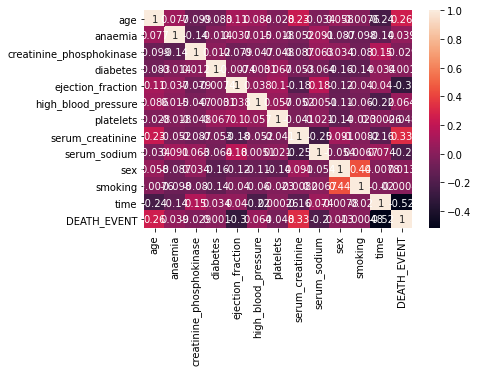

In [8]:
import seaborn as sns
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
corelation

import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=0,shuffle=True)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_pca_train, y_train)
y_pred=classifier.predict(x_pca_test)
print(accuracy_score(y_test, y_pred))


In [9]:
X=x2.drop(columns=[ 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'high_blood_pressure', 'platelets',
        'sex', 'smoking'],axis=1)
X=pd.DataFrame(data=X,columns=['age','ejection_fraction','serum_creatinine','serum_sodium', 'time'])
X.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,75.0,20,1.9,130,4
2,65.0,20,1.3,129,7
3,50.0,20,1.9,137,7
5,90.0,40,2.1,132,8
6,75.0,15,1.2,137,10


In [10]:
from imblearn.over_sampling import RandomOverSampler 
os=RandomOverSampler() 
X,y=os.fit_sample(X,y) 
y.value_counts()

1    194
0    194
Name: DEATH_EVENT, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X,y=os.fit_sample(X,y)
y.value_counts()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
model = RandomForestClassifier(max_depth=10,max_features='auto', min_samples_leaf=2, min_samples_split=5,
                       n_estimators=30)
model.fit(X_train, y_train)
y_predict=model.predict(X_dev)
print("Dev",accuracy_score(y_dev,y_predict))
print("Training",accuracy_score(y_train,model.predict(X_train)))

Dev 0.9487179487179487
Training 0.9741935483870968


In [14]:
from sklearn.model_selection import GridSearchCV
grid =        {'n_estimators':[int(x) for x in np.linspace(start = 0, stop = 30, num = 2)] ,
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.arange(0,11),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,2,4]}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)
print(rf_random.best_params_)
print(rf_random.best_estimator_)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
RandomForestClassifier(max_depth=6, n_estimators=30)


0.9555555555555556 0.9804023337581388


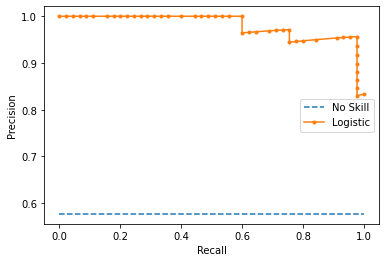

In [15]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_probs = model.predict_proba(X_dev)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_dev, lr_probs)
lr_f1, lr_auc = f1_score(y_dev, y_predict),auc(lr_recall, lr_precision)
print(lr_f1,lr_auc)
no_skill = len(y_dev[y_dev==1]) / len(y_dev)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()